 # *Importing of Dependencies*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from textblob import TextBlob
import os

# *Data set loaded* 

In [2]:
text_data='F:/Week1_Challenge/Data/raw_analyst_ratings.csv'
    # Check if the file exists
if not os.path.exists(text_data):
        raise FileNotFoundError(f"The file {text_data} does not exist.")
# Load the dataset
df=pd.read_csv(text_data,engine='python')
print('Data loaded successfully.')
 # Display the first few rows of the dataset
print(df.head())
    


Data loaded successfully.
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  

# *Data understanding (Missing value  and basic statistics of Dataset)*

In [8]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())
    # Basic statistics of the dataset
print("Basic statistics:")
print(df.describe())
print("dataset info")
print("Dataset shape:", df.shape)
print("Dataset columns:", df.columns)
print("****************************")
print("An overview of the dataset: the last 5 rows")
print(df.tail())
print("===========================")
print("An overview of the dataset: a random sample of 5 rows")
print(df.sample())
    

Missing values in each column:
Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
Sentiment     0
dtype: int64
Basic statistics:
         Unnamed: 0     Sentiment
count  1.407328e+06  1.407328e+06
mean   7.072454e+05  4.905657e-02
std    4.081009e+05  1.830652e-01
min    0.000000e+00 -1.000000e+00
25%    3.538128e+05  0.000000e+00
50%    7.072395e+05  0.000000e+00
75%    1.060710e+06  0.000000e+00
max    1.413848e+06  1.000000e+00
dataset info
Dataset shape: (1407328, 7)
Dataset columns: Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock',
       'Sentiment'],
      dtype='object')
****************************
An overview of the dataset: the last 5 rows
         Unnamed: 0                                           headline  \
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on Chin

# *Performed Exploratory Data Analysis (EDA) analysis*

In [5]:
#  Descriptive statistics for the 'headline' column
def calculate_sentiment (text):
 return TextBlob (text).sentiment. polarity
# Applying the sentiment analysis function for headlines
df ['Sentiment'] = df['headline'].apply(calculate_sentiment)


In [6]:

df.head()


,Unnamed: 0,headline,url,publisher,date,stock,Sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.0
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.0


Descriptive statistics for 'headline' column:
count                     1407328
unique                     845770
top       Benzinga's Top Upgrades
freq                         5449
Name: headline, dtype: object

Missing values in 'headline' column: 
0

Number of unique headlines:
845770

Most frequent headlines:
headline
Benzinga's Top Upgrades                     5449
Benzinga's Top Downgrades                   5372
Benzinga's Top Initiations                  4241
Stocks That Hit 52-Week Lows On Thursday    3962
Morning Market Losers                       3440
Name: count, dtype: int64

Sentiment distribution:
count    1.407328e+06
mean     4.905657e-02
std      1.830652e-01
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: Sentiment, dtype: float64


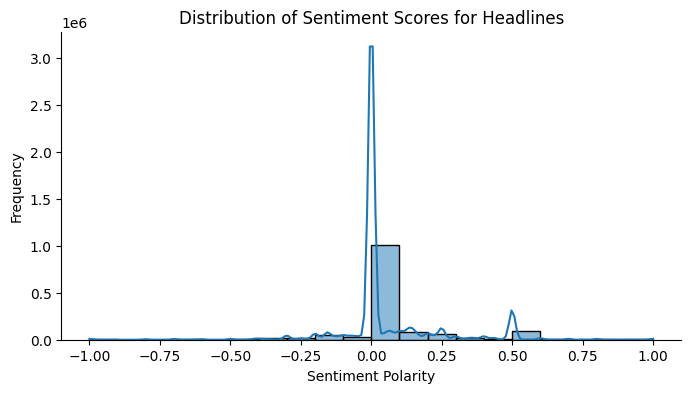

In [15]:
# Display descriptive statistics for the 'headline' column 
print("Descriptive statistics for 'headline' column:") 
print(df['headline'].describe())
# Check for missing values in the 'headline' column 
print("\nMissing values in 'headline' column: ") 
print(df['headline'].isnull().sum())
# Get the number of unique headlines 
print("\nNumber of unique headlines:") 
print(df['headline'].nunique())
# Display the most frequent headlines 
print("\nMost frequent headlines:")
print (df['headline'].value_counts().head())
#  further analyze the distribution of sentiment scores calculated earlier 
print("\nSentiment distribution:")
print(df['Sentiment'].describe())
# Plot the distribution of sentiment scores
plt.figure(figsize=(8, 4))
sns.histplot(df [ 'Sentiment'], bins=20, kde=True)
plt.title('Distribution of Sentiment Scores for Headlines')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.gca().spines[['top','right']].set_visible(False)
plt.show()
# Display the correlation matrix


# Sentiment analysis

In [14]:
#Analysis sentiment most positive and most negative in headlines 
# Analyze the sentiment of the most positive and negative headlines 
most_positive_headlines= df.nlargest (5, 'Sentiment') 
print("\nMost Positive Headlines:")
print (most_positive_headlines [['headline', 'Sentiment']])
most_negative_headlines =df.nsmallest (5, 'Sentiment')
print("\nMost Negative Headlines:")
print (most_negative_headlines [['headline', 'Sentiment']])
# Analyze the sentiment of the most positive and negative headlines
most_positive_headlines=df.nlargest (5, 'Sentiment') 
print("\nMost Positive Headlines:")
print (most_positive_headlines [['headline', 'Sentiment']])
most_negative_headlines= df.nsmallest (5, 'Sentiment') 
print("\nMost Negative Headlines:")
print (most_negative_headlines [['headline', 'Sentiment']])
output_file = 'F:/Week1_Challenge/Data/Analyst_ratings_with_sentiment.csv'
df.to_csv(output_file, index=False)
print(f"Data with sentiment scores saved to {output_file}")


Most Positive Headlines:
                                               headline  Sentiment
819            Best Buy: Analysts' Upgrades, Downgrades        1.0
1343    OneMove(TM) Records its Best Month Ever in July        1.0
1382  Klondike Silver Completes Underground Drilling...        1.0
1849                             10 Best Stocks Of 2017        1.0
2270          Miners: The Best Way To Play A Rate Hike?        1.0

Most Negative Headlines:
                                               headline  Sentiment
2552  Tech, Semiconductors Among Worst Performers As...       -1.0
3175               I've just made a horrible investment       -1.0
5658   Worst Performing Industries For October 13, 2016       -1.0
5710   Worst Performing Industries For December 2, 2014       -1.0
6100                            10 Worst Stocks Of 2017       -1.0

Most Positive Headlines:
                                               headline  Sentiment
819            Best Buy: Analysts' Upgrades, Downgr

# headline textual length 


Descriptive statistics for headline lengths:
count    1.407328e+06
mean     1.141671e+01
std      6.352997e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.000000e+01
75%      1.300000e+01
max      7.700000e+01
Name: headline_length, dtype: float64


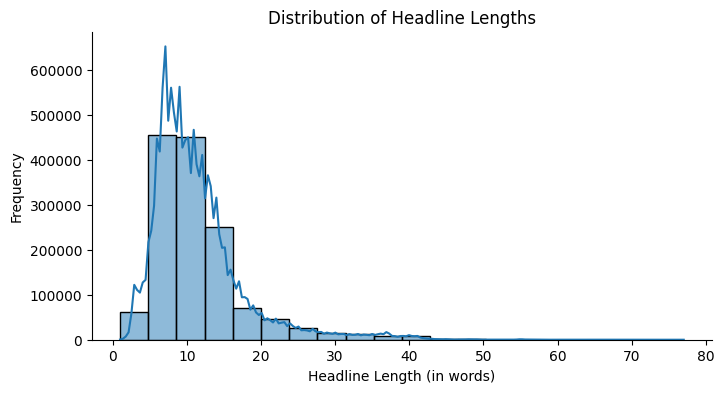

In [30]:
#Obtain basic statistics for textual lengths (like headline length)
df['headline_length'] = df['headline'].apply(lambda x: len(str(x).split()))
# Display descriptive statistics for headline lengths
print("\nDescriptive statistics for headline lengths:")
print(df['headline_length'].describe())
# Plot the distribution of headline lengths
plt.figure(figsize=(8, 4))
sns.histplot(df['headline_length'], bins=20, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length (in words)')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()



Top 10 Publishers by Article Count:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


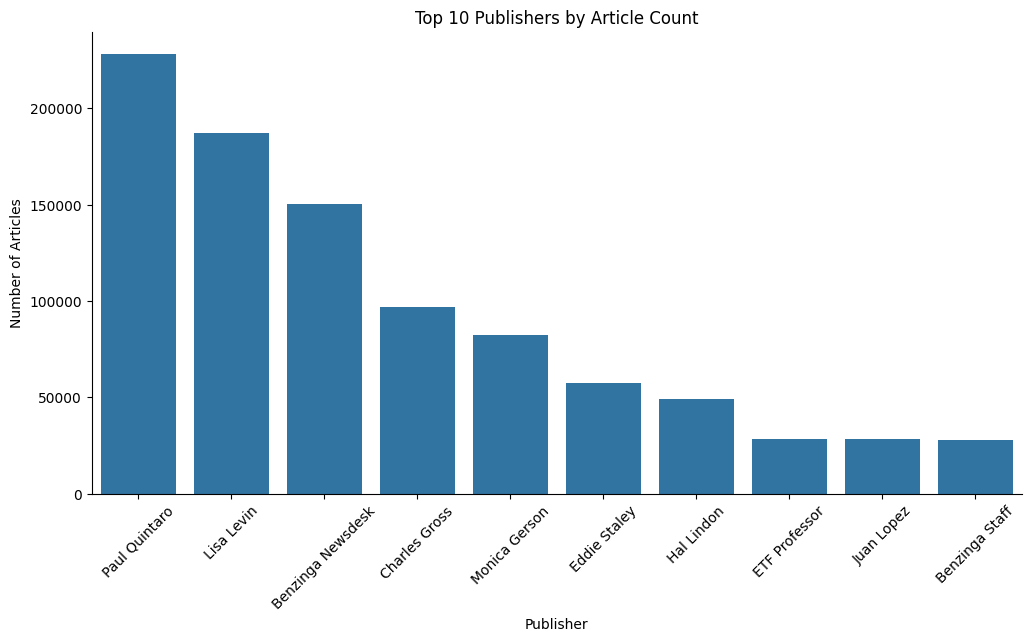

In [31]:
#Count the number of articles per publisher to identify which publishers are most active
publisher_counts = df['publisher'].value_counts()
# Display the top 10 publishers by article count
print("\nTop 10 Publishers by Article Count:")
print(publisher_counts.head(10))
# Plot the number of articles per publisher
plt.figure(figsize=(12, 6))
sns.barplot(x=publisher_counts.index[:10], y=publisher_counts.values[:10])
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


# Analyzing of the publication date 

Some publication dates could not be converted. Please check the format.

Monthly article counts:
     year  month  article_count
0  2011.0    4.0              6
1  2011.0    5.0             78
2  2011.0    6.0             96
3  2011.0    7.0            137
4  2011.0    8.0            149
5  2011.0    9.0             90
6  2011.0   10.0             71
7  2011.0   11.0             70
8  2011.0   12.0             63
9  2012.0    1.0             60

Number of articles per day of the week:
day_of_week
Friday        9381
Monday       10322
Saturday       267
Sunday         436
Thursday     12688
Tuesday      11002
Wednesday    11891
Name: count, dtype: int64


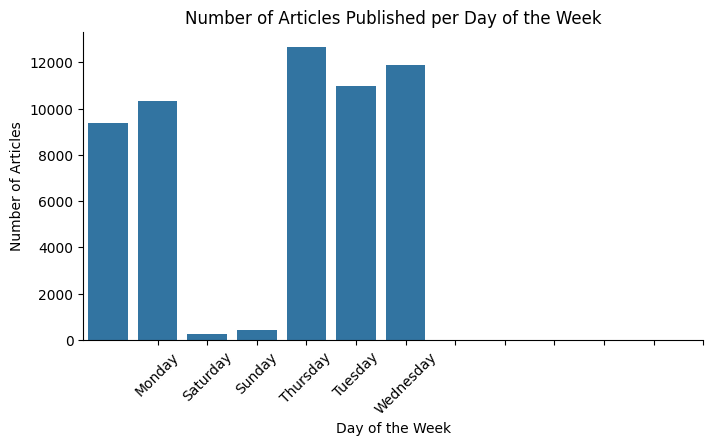

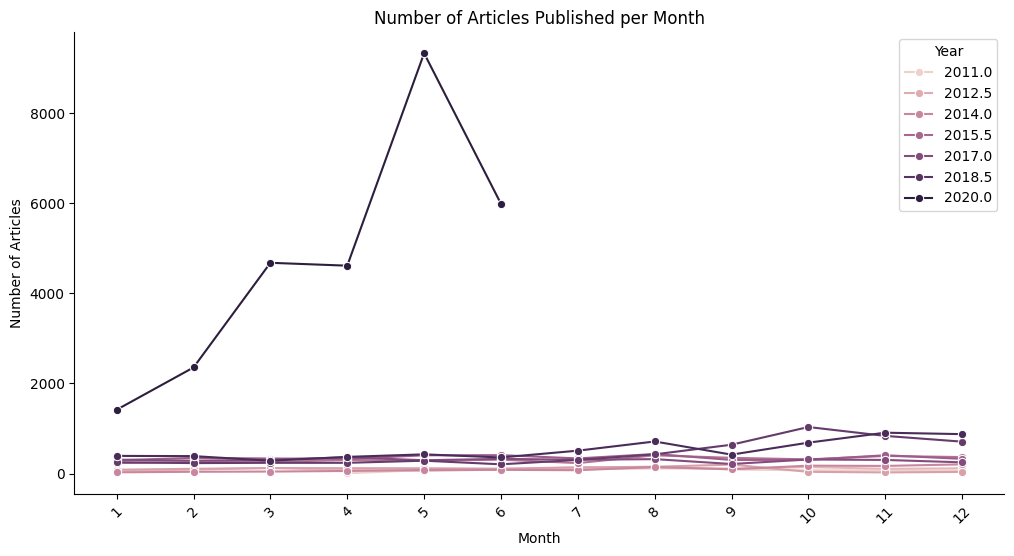

In [51]:
#Analyzing of the publication dates to see trends over time, such as increased news frequency on particular days or during specific events
# Convert 'publication_date' to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')
# Check for conversion errors
if df['date'].isnull().any():
    print("Some publication dates could not be converted. Please check the format.")
# Extract year and month from the publication date
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
# Count the maximum number of articles per month
monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='article_count')
print("\nMonthly article counts:")
print(monthly_counts.head(10))
#count the maximum number of articles per day of the week
df['day_of_week'] = df['date'].dt.day_name()
# Count the number of articles per day of the week
day_counts = df['day_of_week'].value_counts().sort_index()
print("\nNumber of articles per day of the week:")
print(day_counts.head(10))
# Plot the number of articles per day of the week
plt.figure(figsize=(8, 4))
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.title('Number of Articles Published per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.xticks(range(1, 13), rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

# Plot the number of articles per month
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_counts, x='month', y='article_count', hue='year', marker='o')
plt.title('Number of Articles Published per Month') 
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(range(1, 13), rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)   
plt.legend(title='Year')
plt.show() 





# Text Analysis


10 Most Common Words in Headlines:
[('stocks', 159102), ('vs', 138801), ('eps', 127403), ('shares', 112655), ('reports', 108429), ('market', 89225), ('update:', 85354), ('earnings', 80855), ('top', 78354), ('sales', 77924)]


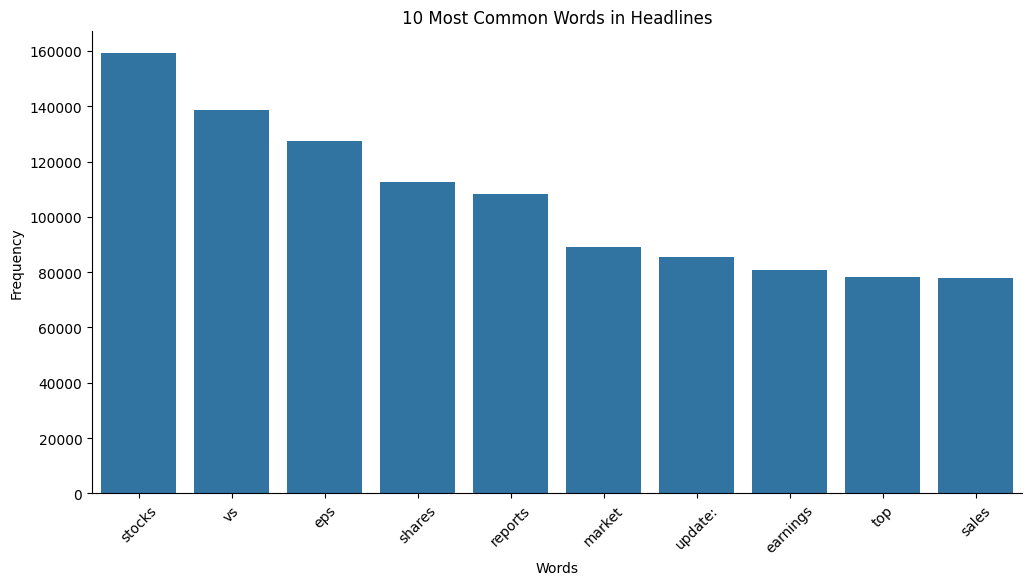

In [ ]:
#text analysis
# Analyze the most common words in the headlines
from collections import Counter
from nltk.corpus import stopwords
import nltk
# Download NLTK stopwords if not already downloaded
#nltk.download('stopwords')
# Get English stopwords
stop_words = set(stopwords.words('english'))
# Tokenize the headlines and remove stopwords
def tokenize_and_remove_stopwords(text):
    tokens = text.split()
    return [word.lower() for word in tokens if word.lower() not in stop_words]
# Apply the function to the 'headline' column
df['tokens'] = df['headline'].apply(tokenize_and_remove_stopwords)
# Flatten the list of tokens and count the most common words
all_tokens = [word for tokens in df['tokens'] for word in tokens]
word_counts = Counter(all_tokens)

# Display the 10 most common words
print("\n10 Most Common Words in Headlines:")
print(word_counts.most_common(10))
# Plot the 10 most common words
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in word_counts.most_common(10)], y=[word[1] for word in word_counts.most_common(10)])
plt.title('10 Most Common Words in Headlines')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [55]:
#extracting topics or significant events (like "FDA approval", "price target", etc.)
def extract_topics(text):
    topics = []
    if 'FDA' in text or 'approval' in text:
        topics.append('FDA Approval')
    if 'price target' in text:
        topics.append('Price Target')
    if 'earnings' in text:
        topics.append('Earnings Report')
    if 'acquisition' in text or 'merger' in text:
        topics.append('Acquisition/Merger')
    return ', '.join(topics)
# Apply the function to the 'headline' column
df['topics'] = df['headline'].apply(extract_topics)
# Display the most common topics
print("\nMost Common Topics in Headlines:")
print(df['topics'].value_counts().head(10))
# Plot the most common topics



Most Common Topics in Headlines:
topics
                                       1391101
FDA Approval                             11530
Earnings Report                           2365
Price Target                              1730
Acquisition/Merger                         512
FDA Approval, Acquisition/Merger            40
Price Target, Earnings Report               39
Earnings Report, Acquisition/Merger          9
FDA Approval, Price Target                   2
Name: count, dtype: int64


# Time Series Analysis

1.Number article published per year 


Number of Articles Published per Year:
publication_year
2011.0      760
2012.0     1187
2013.0     1240
2014.0     1189
2015.0     3695
2016.0     4223
2017.0     3581
2018.0     5395
2019.0     6325
2020.0    28392
Name: count, dtype: int64


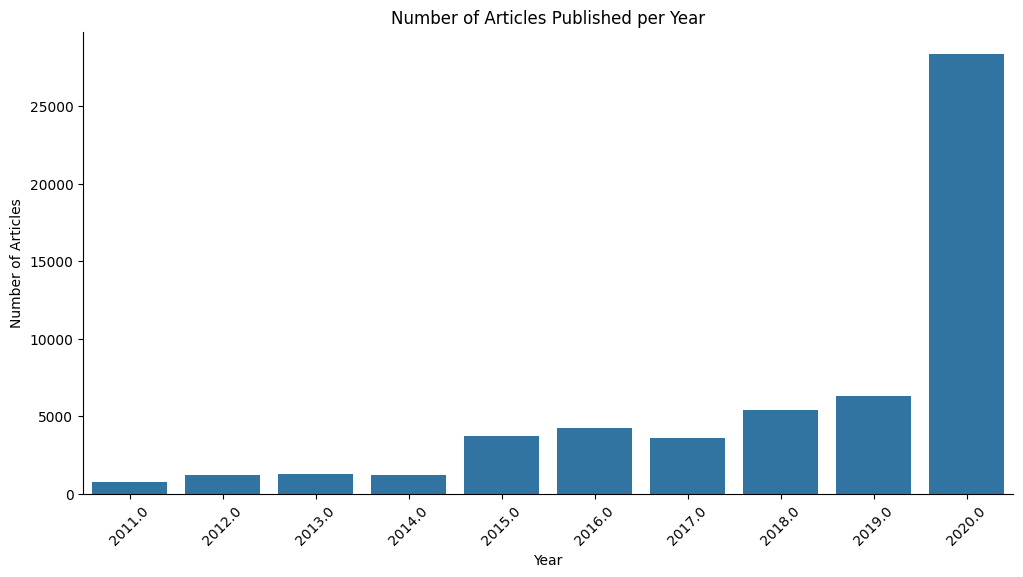

In [56]:
# publication frequency vary over time
# Analyze the publication frequency over time
df['publication_year'] = df['date'].dt.year
# Count the number of articles per year
yearly_counts = df['publication_year'].value_counts().sort_index()
# Display the number of articles per year
print("\nNumber of Articles Published per Year:")
print(yearly_counts)
# Plot the number of articles published per year
plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_counts.index, y=yearly_counts.values)
plt.title('Number of Articles Published per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()



2. publication frequency over time 


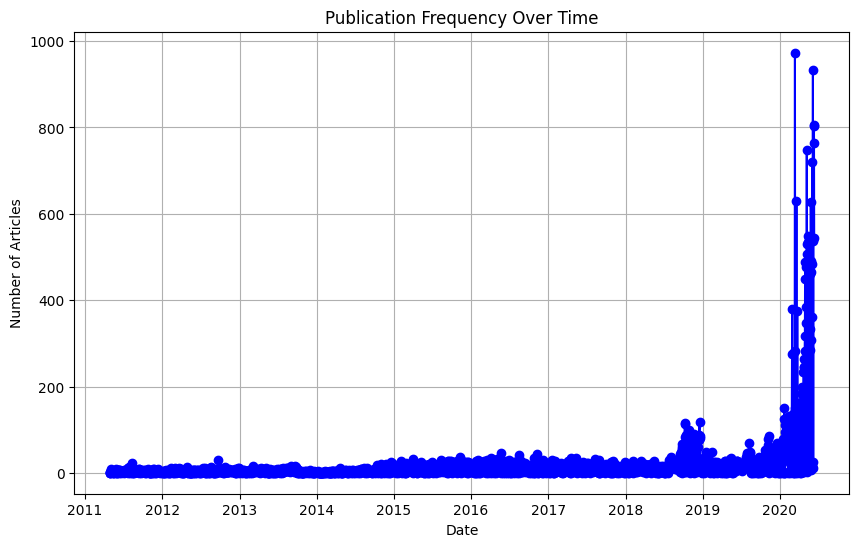

In [57]:
#Publication Frequency Over Time 
# Group by date and count the number of publications
df['publication_date'] = df['date'].dt.date
daily_counts = df.groupby('publication_date').size()
# Plot daily publication frequency
plt.figure(figsize=(10, 6))
daily_counts.plot(kind='line', marker='o', color='blue')
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


3. published per hour odf day 

C:\Users\user\AppData\Local\Temp\ipykernel_57932\2639295497.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='viridis')


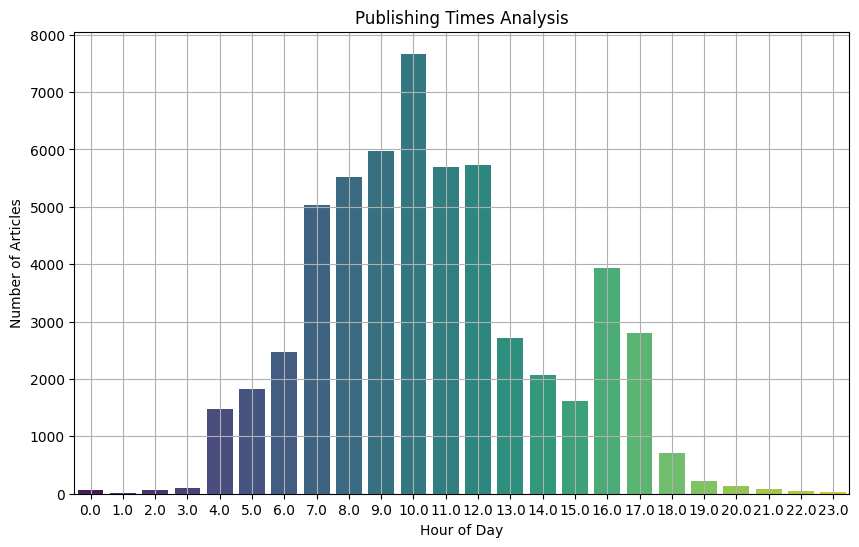

In [58]:
#publishing Times Analysis ###
# Extract hour from the `date` column
df['publication_hour'] = df['date'].dt.hour

# Count the number of publications by hour
hourly_counts = df['publication_hour'].value_counts().sort_index()
# Plot publishing times
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='viridis')
plt.title('Publishing Times Analysis')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# Publisher Analaysis 

In [59]:
publisher_counts = df['publisher'].value_counts()
publisher_counts.head(20)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: count, dtype: int64

In [60]:
publisher_counts.tail(10)

publisher
Goatmug Blog                  1
Christian Fromhertz           1
swenstock                     1
BuyAndHoldPlus                1
Brett's Stock Market Pulse    1
MoneyGeek                     1
muathe                        1
Robert Morris                 1
LeftCoastHedgie               1
Jeremie Capron                1
Name: count, dtype: int64

Extracting Domian 

In [61]:
### Extract Unique Domains from Email Addresses ###
# Identify if a publisher name is an email address
df['is_email'] = df['publisher'].str.contains('@')

# Extract domain from email addresses
df['domain'] = df['publisher'].apply(lambda x: x.split('@')[1] if '@' in x else None)
# Count the number of articles by domain
domain_counts = df['domain'].value_counts()
df.head()


,Unnamed: 0,headline,url,publisher,date,stock,Sentiment,headline_length,year,month,day_of_week,tokens,topics,publication_year,publication_date,publication_hour,is_email,domain
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.0,7,2020.0,6.0,Friday,"[stocks, hit, 52-week, highs, friday]",,2020.0,2020-06-05,10.0,False,None
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.0,7,2020.0,6.0,Wednesday,"[stocks, hit, 52-week, highs, wednesday]",,2020.0,2020-06-03,10.0,False,None
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.0,5,2020.0,5.0,Tuesday,"[71, biggest, movers, friday]",,2020.0,2020-05-26,4.0,False,None
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.0,7,2020.0,5.0,Friday,"[46, stocks, moving, friday's, mid-day, session]",,2020.0,2020-05-22,12.0,False,None
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.0,14,2020.0,5.0,Friday,"[b, securities, maintains, neutral, agilent, t...",,2020.0,2020-05-22,11.0,False,None
